In [46]:
import omnipath as op
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pySankey import sankey as sn
import mellon as ml
import networkx as nx
from matplotlib.pyplot import figure
import glob
import netrd
import itertools
import random
import pickle
random.seed(42)

In [56]:
df = pd.read_csv('raw_data/LAMDA_genes/LAMDA_Signature_Human.csv', index_col = 0)
df.set_index('Gene', inplace = True)
df = df[(df['Color']=='Enriched in NeuN FDR < 0.01') | (df['Color']=='Enriched in pSyn FDR < 0.01')] #| (df['Color']=='Enriched in NeuN FDR < 0.05') | (df['Color']=='Enriched in pSyn FDR < 0.05')]
df

,Feature,Comparison,Estimate,P,FDR,Color,invert_P
Gene,,,,,,,
AGL,AGL,NeuN vs pSyn,0.707017,5.587390e-04,0.006616,Enriched in pSyn FDR < 0.01,3.252791
CDKN1C,CDKN1C,NeuN vs pSyn,0.680045,9.812066e-06,0.000390,Enriched in pSyn FDR < 0.01,5.008240
GK,GK,NeuN vs pSyn,0.770016,8.940216e-04,0.009435,Enriched in pSyn FDR < 0.01,3.048652
MSH6,MSH6,NeuN vs pSyn,0.527703,5.039076e-04,0.006148,Enriched in pSyn FDR < 0.01,3.297649
HADHA,HADHA,NeuN vs pSyn,0.611812,9.584882e-06,0.000385,Enriched in pSyn FDR < 0.01,5.018413
...,...,...,...,...,...,...,...
SPTB,SPTB,NeuN vs pSyn,0.691136,3.833974e-05,0.001018,Enriched in pSyn FDR < 0.01,4.416351
ST8SIA1,ST8SIA1,NeuN vs pSyn,0.570726,7.052524e-05,0.001555,Enriched in pSyn FDR < 0.01,4.151655
UPK3BL1,UPK3BL1,NeuN vs pSyn,-1.028352,1.670205e-07,0.000021,Enriched in NeuN FDR < 0.01,-6.777230


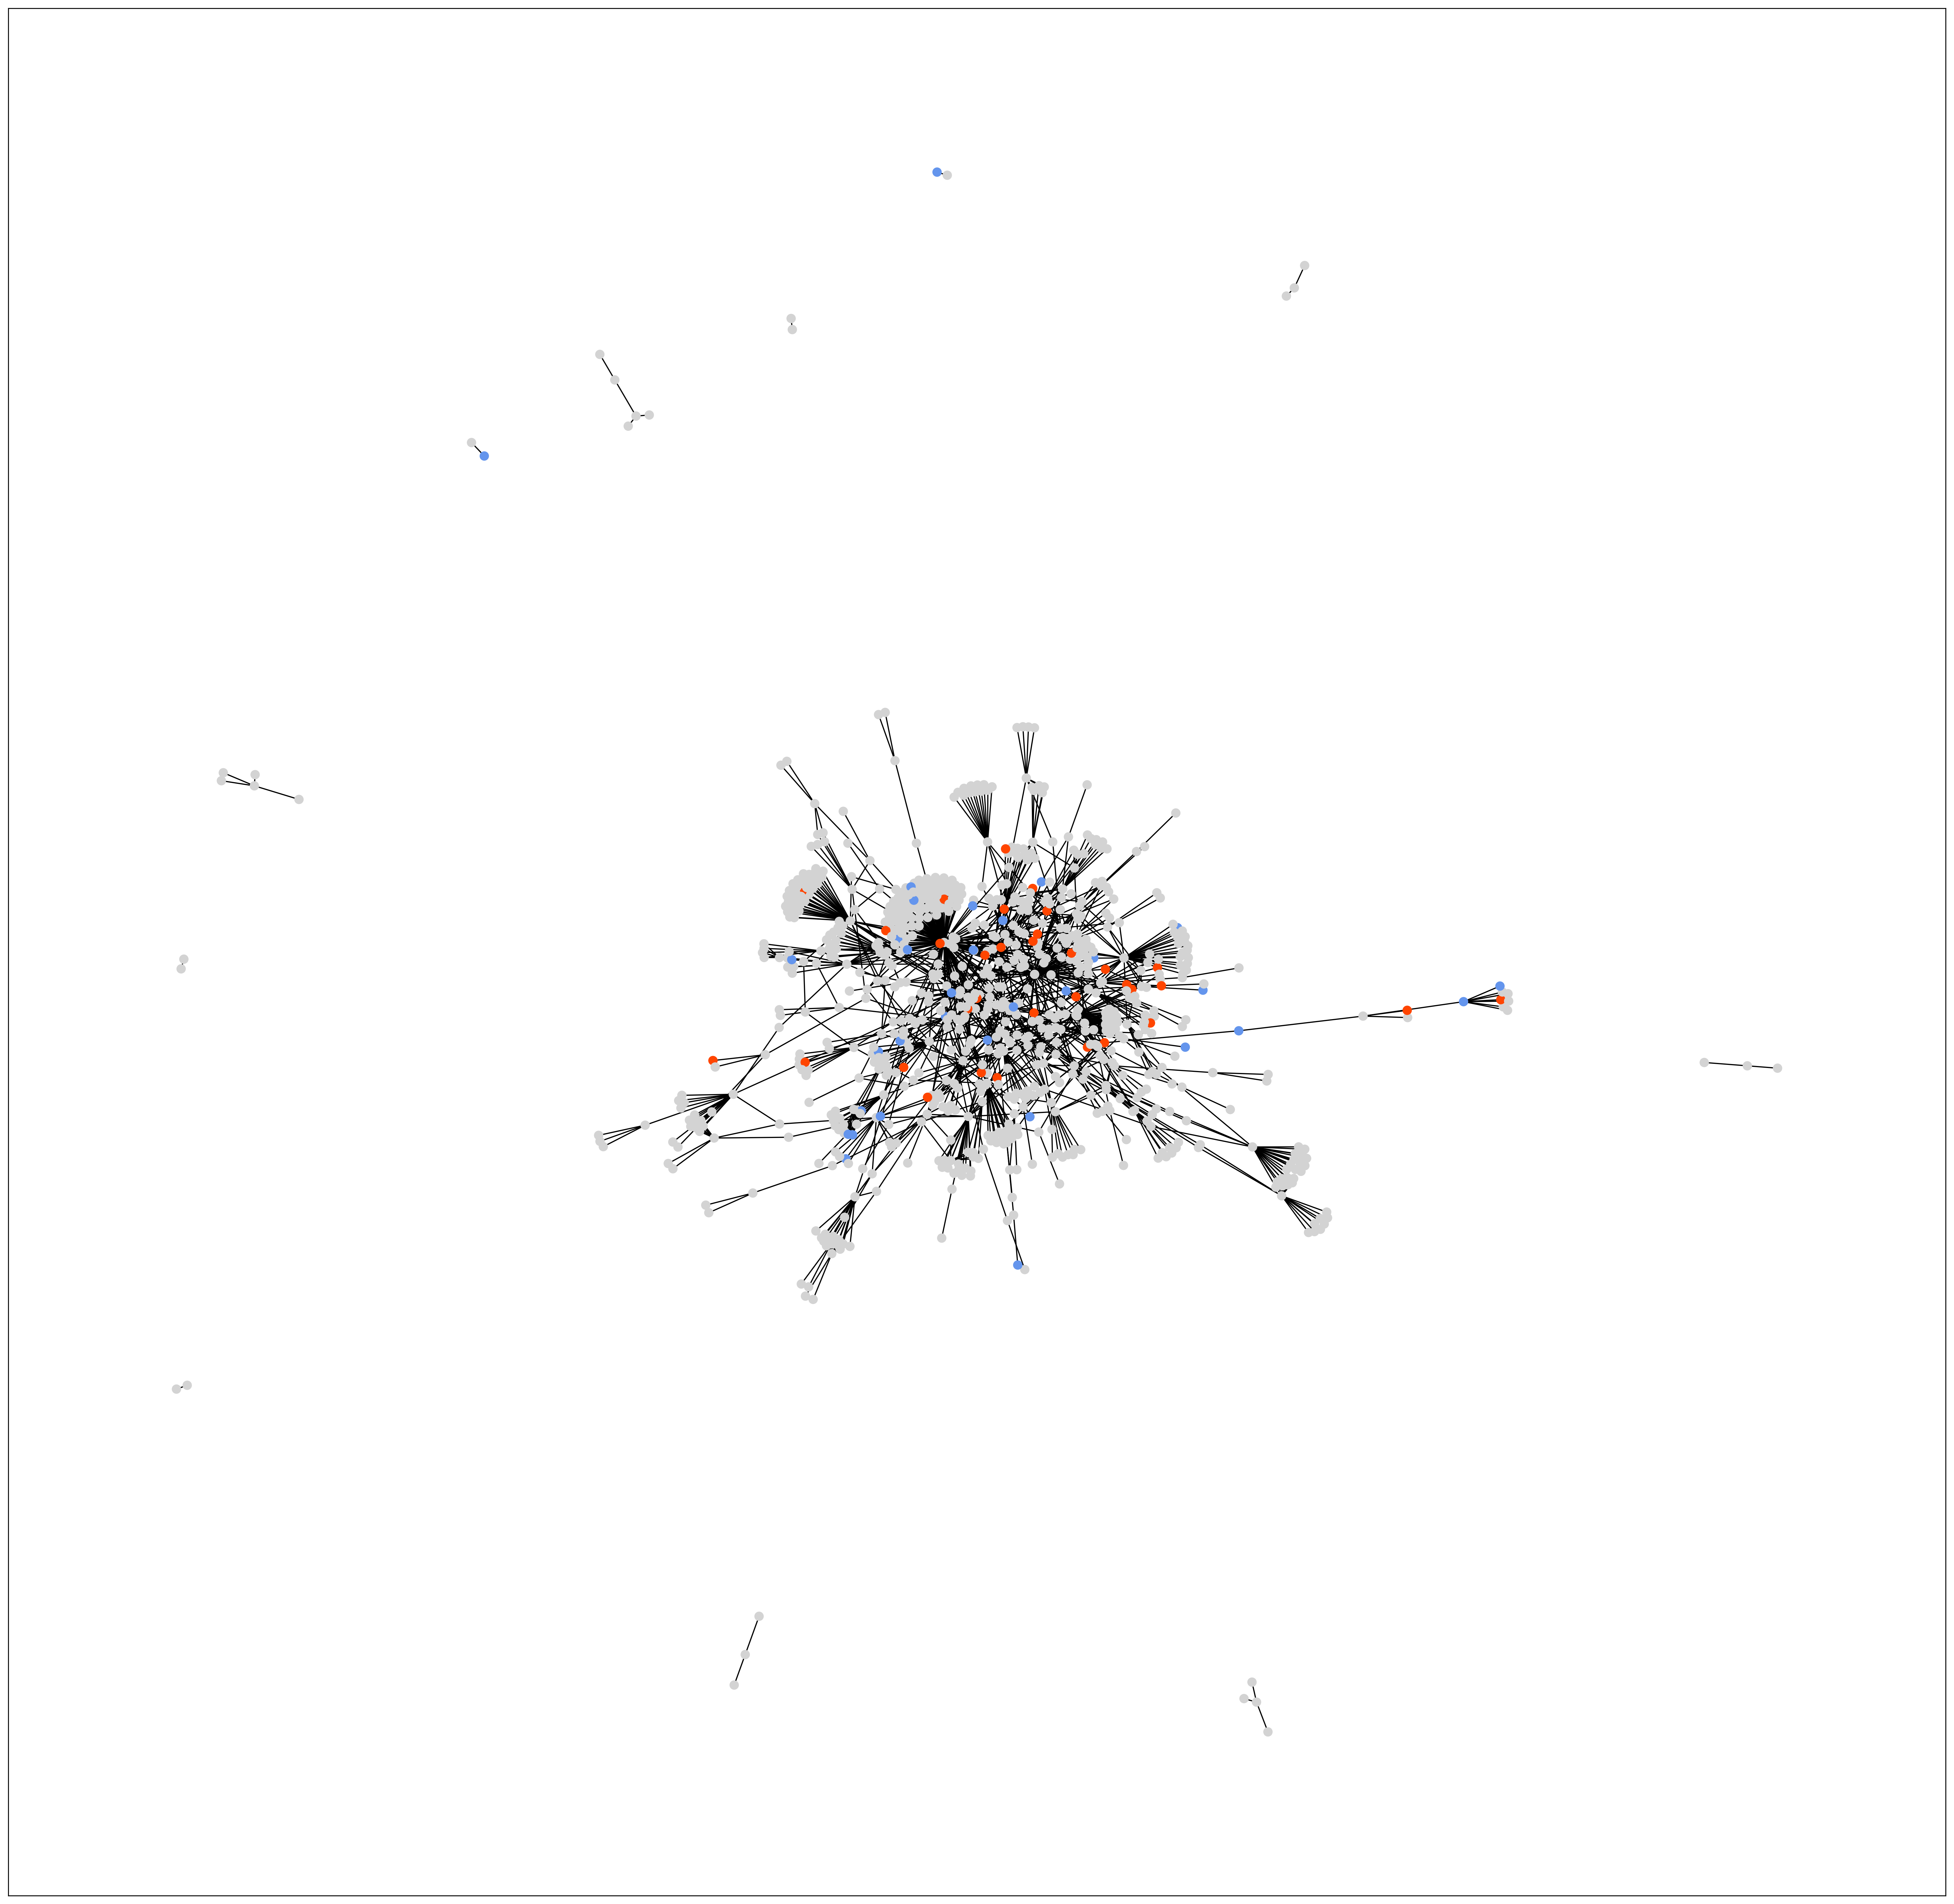

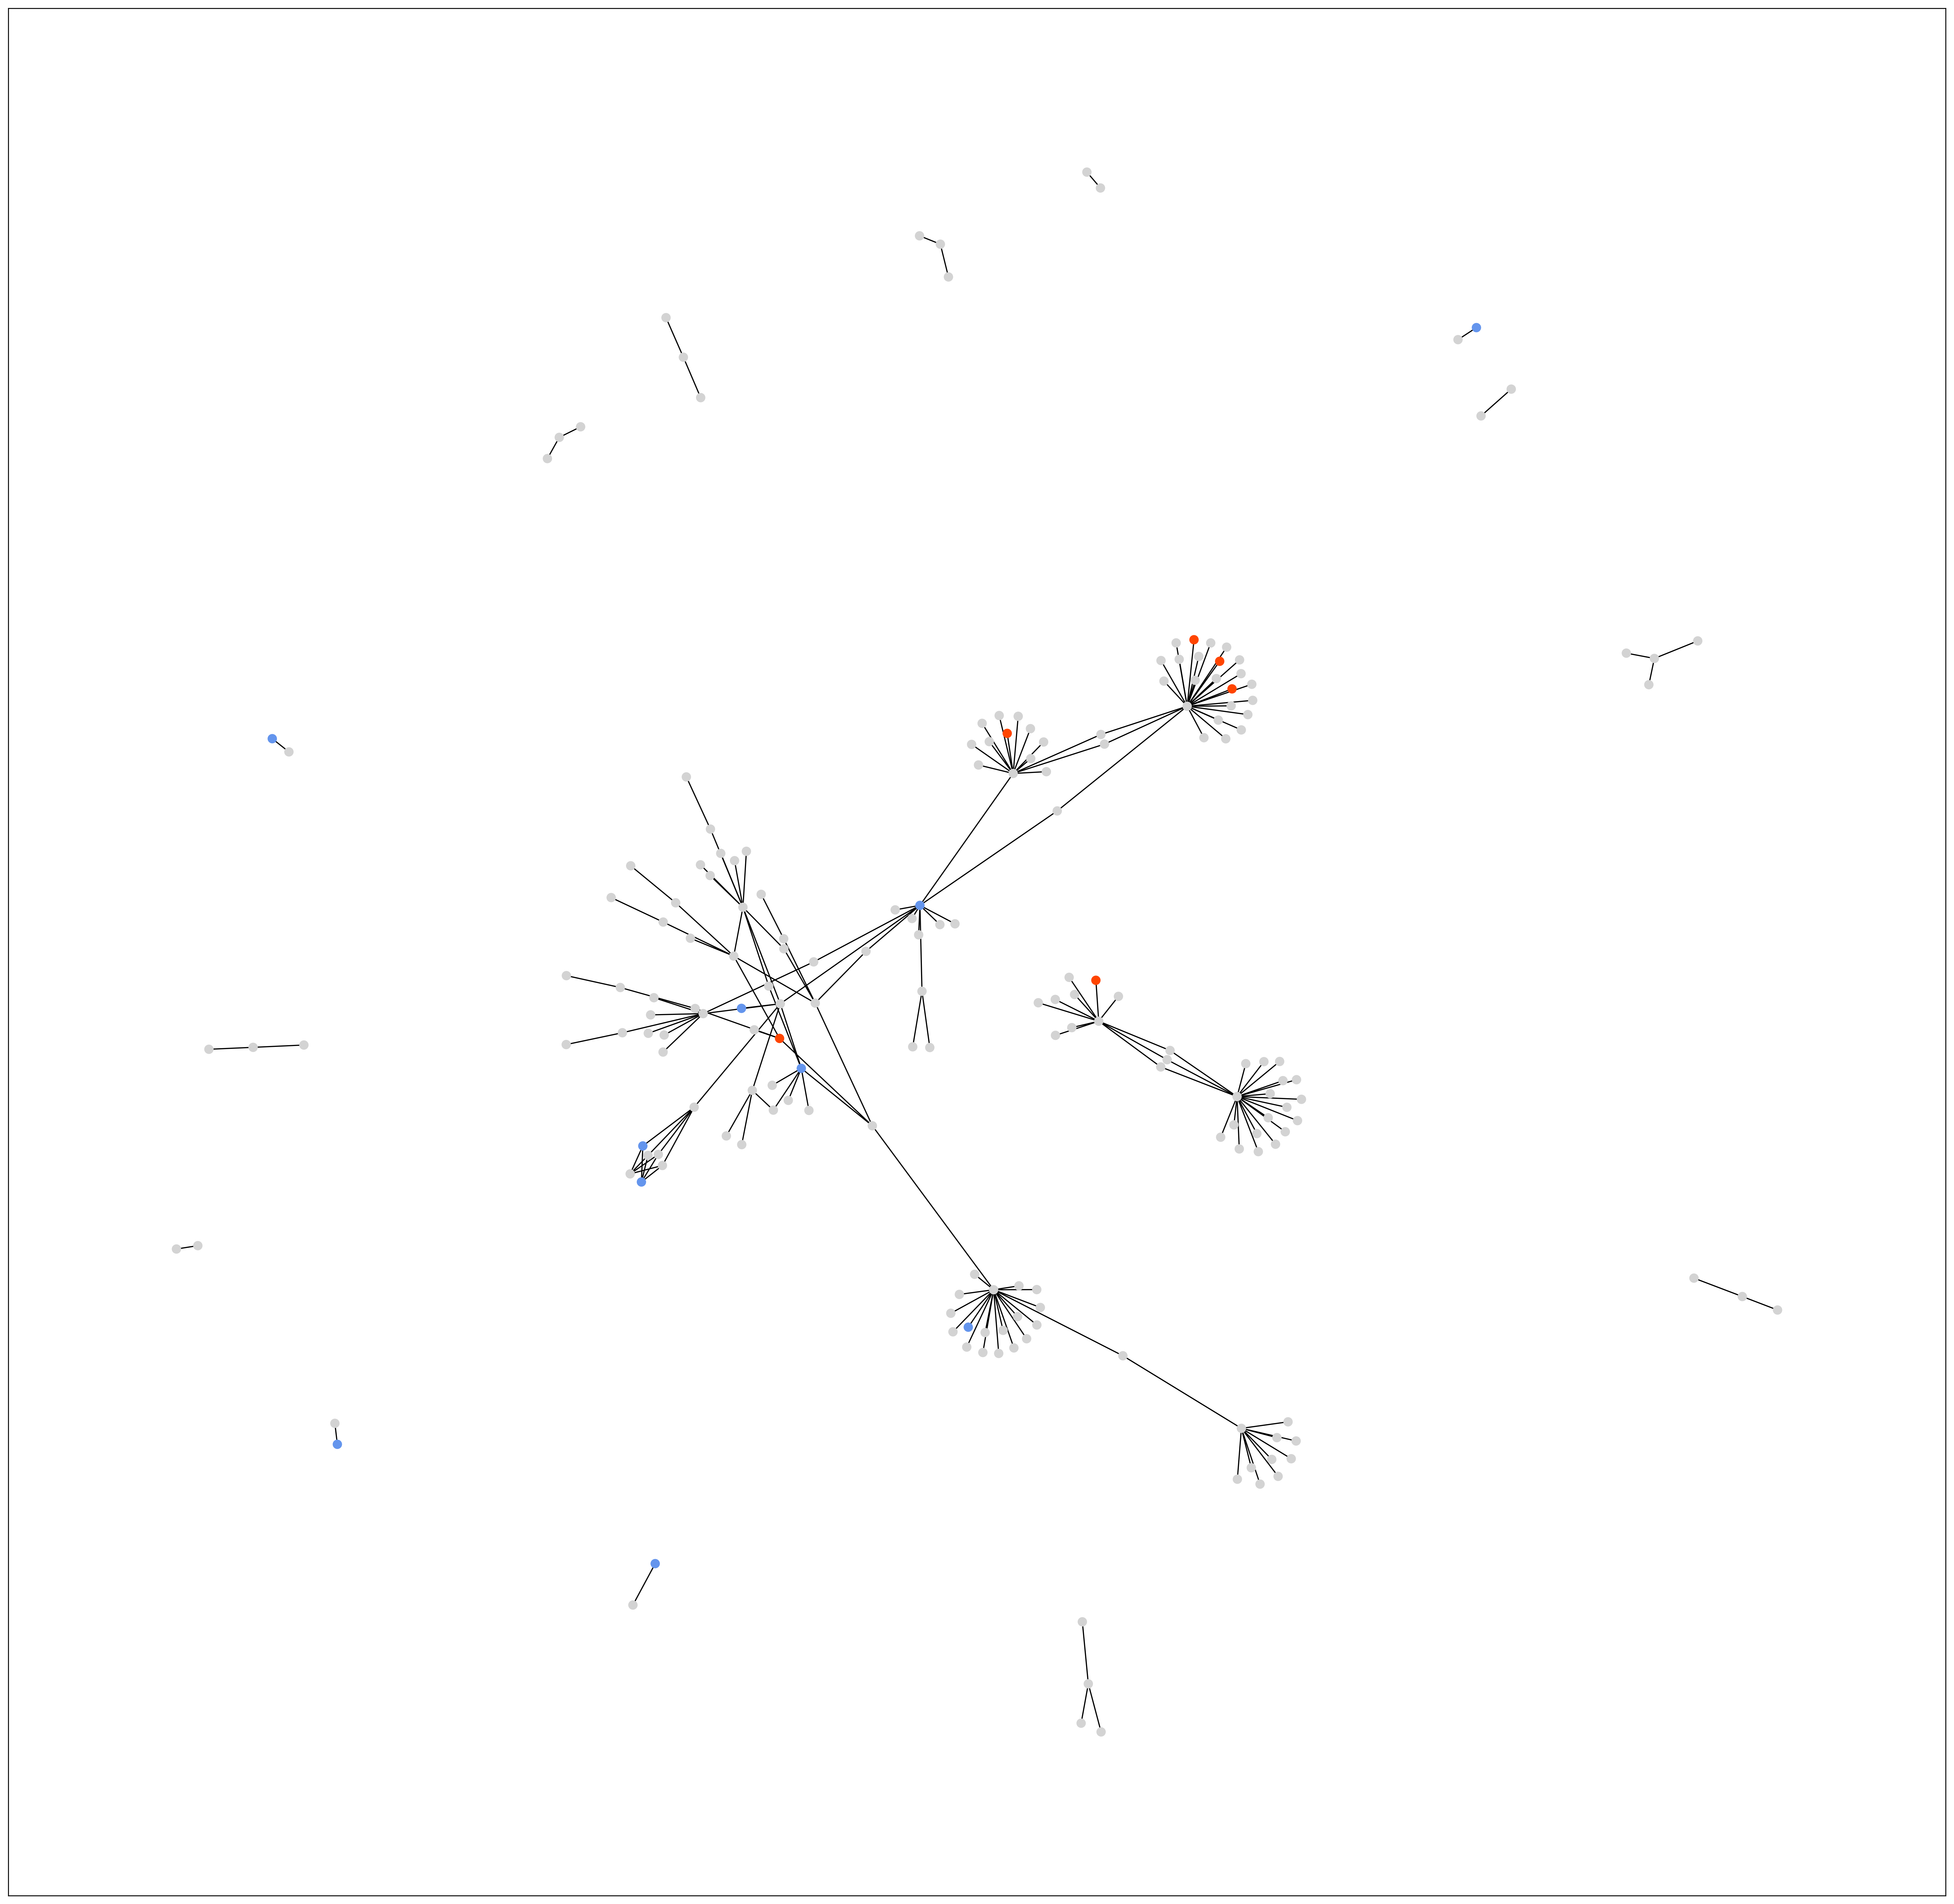

In [55]:
thresh = ['0.4', '0.7']

for res in thresh:
    H = pickle.load(open('processed_data/03-LR_network_visualisation/03a_genetic_association_test/network_file_%s.pickle' % res, 'rb'))
    LAMDA = list(df.index)
    colours = []
    for i in list(H.nodes):
        if i in list(set(list(H.nodes)) & set(LAMDA)):
            if df.loc[i]['invert_P']>0:
                colours.append('orangered')
            else:
                colours.append('cornflowerblue')
        else:
            colours.append('lightgray')
    plt.figure(figsize=(30,30), dpi = 300)
    sm = nx.draw_networkx(H, node_color=colours, with_labels=False, node_size = 50)
    #plt.savefig()
    plt.show()

In [64]:
H = pickle.load(open('processed_data/03-LR_network_visualisation/03a_genetic_association_test/network_file_0.4.pickle', 'rb'))
LAMDA = list(df.index)
len(list(set(list(H.nodes)) & set(LAMDA)))

26

<AxesSubplot:ylabel='Count'>

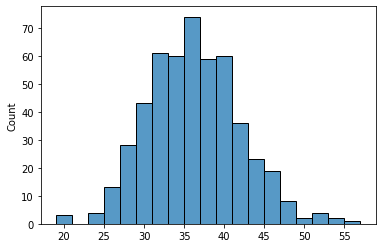

In [71]:
from pyensembl import EnsemblRelease
import mygene
gtex_link = 'raw_data/GTEx_tissue_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz'
exp = pd.read_csv(gtex_link, sep='\t', index_col='Description', skiprows=2)
exp_cns = exp


ensembl = EnsemblRelease(109)
genes = ensembl.genes()

mg = mygene.MyGeneInfo()
ensembl_gtex = list(np.unique(pd.DataFrame(list(exp_cns.index.str.split('.')))[0]))

# create a DataFrame of gene information
ensembl_ann = pd.DataFrame({
    'gene_id': [gene.gene_id for gene in genes],
    'gene_name': [gene.gene_name for gene in genes],
    'chromosome': [gene.contig for gene in genes],
    'type': [gene.biotype for gene in genes]
})
gtex_annotated = ensembl_ann[ensembl_ann['gene_name'].isin(ensembl_gtex)] # take list of genes expressed in brain
protein = gtex_annotated[gtex_annotated['type']=='protein_coding']        # take protein-expressing ones
protein = protein.rename(columns={'gene_name':'gene'}).set_index('gene', drop=True)

overlap = []

for n in range(0,500):
    random = protein.sample(n=len(LAMDA))
    overlap.append(len(list(set(list(H.nodes)) & set(list(random.index)))))
sns.histplot(overlap)

In [72]:
H = pickle.load(open('processed_data/03-LR_network_visualisation/03a_genetic_association_test/network_file_0.7.pickle', 'rb'))
LAMDA = list(df.index)
len(list(set(list(H.nodes)) & set(LAMDA)))

7

<AxesSubplot:ylabel='Count'>

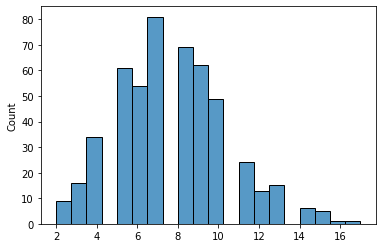

In [73]:
from pyensembl import EnsemblRelease
import mygene
gtex_link = 'raw_data/GTEx_tissue_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz'
exp = pd.read_csv(gtex_link, sep='\t', index_col='Description', skiprows=2)
exp_cns = exp


ensembl = EnsemblRelease(109)
genes = ensembl.genes()

mg = mygene.MyGeneInfo()
ensembl_gtex = list(np.unique(pd.DataFrame(list(exp_cns.index.str.split('.')))[0]))

# create a DataFrame of gene information
ensembl_ann = pd.DataFrame({
    'gene_id': [gene.gene_id for gene in genes],
    'gene_name': [gene.gene_name for gene in genes],
    'chromosome': [gene.contig for gene in genes],
    'type': [gene.biotype for gene in genes]
})
gtex_annotated = ensembl_ann[ensembl_ann['gene_name'].isin(ensembl_gtex)] # take list of genes expressed in brain
protein = gtex_annotated[gtex_annotated['type']=='protein_coding']        # take protein-expressing ones
protein = protein.rename(columns={'gene_name':'gene'}).set_index('gene', drop=True)

overlap = []

for n in range(0,500):
    random = protein.sample(n=len(LAMDA))
    overlap.append(len(list(set(list(H.nodes)) & set(list(random.index)))))
sns.histplot(overlap)

<AxesSubplot:ylabel='Count'>

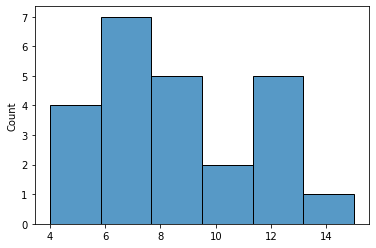

In [ ]:
random.index

Index(['DOK7', 'ORMDL2', 'TRIM64', 'EXD1', 'ANGPTL8', 'EMD', 'ANKRD26',
       'MED20', 'ASB18', 'LRP12',
       ...
       'ELOVL6', 'NUMB', 'COL9A3', 'OR2K2', 'CRYBB1', 'EIF4A3', 'NUTM2D',
       'GPC3', 'ZNF513', 'MARCKSL1'],
      dtype='object', name='gene', length=745)

In [ ]:
list_longest = []
for res in range(0,13):
    db = op.interactions.import_intercell_network(transmitter_params = {"categories":"ligand"}, receiver_params = {"categories": "receptor"})
    print(np.shape(db))
    db = db[np.logical_not(db['genesymbol_intercell_source'].str.startswith('HLA'))]
    db = db[np.logical_not(db['genesymbol_intercell_target'].str.startswith('HLA'))]
    db = db[~db['genesymbol_intercell_target'].astype(str).str.startswith('COMPLEX')]
    db = db[~db['genesymbol_intercell_source'].astype(str).str.startswith('COMPLEX')]
    print(np.shape(db))
    tgts_all = pd.read_csv(path[res])
    tgts_all['gene']=tgts_all['genes']
    tgts = tgts_all.drop(columns=['genes']).set_index(['gene'])

    source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts, db)

    LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]
    unique_genes = np.unique(list(LRs['genesymbol_intercell_source'])+list(LRs['genesymbol_intercell_target']))

    #comparison['number of LRs'].iloc[res] = len(unique_genes)

    # Adjacency matrix with entire network across all diseases
    adj_LRs = pd.DataFrame(np.zeros(shape=(len(unique_genes), len(unique_genes))), index = unique_genes, columns = unique_genes)

    for n in range (0, np.shape(LRs)[0]):
        adj_LRs.iloc[adj_LRs.index.get_loc(LRs.iloc[n]['genesymbol_intercell_source']), adj_LRs.columns.get_loc(LRs.iloc[n]['genesymbol_intercell_target'])] += 1

    #Number of cell-cell interactions ligands of interest are involved in
    print(adj_LRs.sum(axis = 0).sort_values(ascending=False)[adj_LRs.sum(axis = 0).sort_values(ascending=False).index.isin(list(tgts.index))])

    #Number of cell-cell interactions receptors of interest are involved in
    adj_LRs.sum(axis = 1).sort_values(ascending=False)[adj_LRs.sum(axis = 1).sort_values(ascending=False).index.isin(list(tgts.index))]

    # Overview of LR network and calculating rank of importance with PageRank

    H = nx.from_pandas_adjacency(adj_LRs)
    comms = ml.network.louvain_communities(H, seed = 123, resolution = 0.01)

    # Check which is the largest network and save % of total LRs in network
    for l in range(0,len(comms)):
        this = len(comms[l])
                    
        if (l == 0):
            longest = this
            cluster = comms[l]
        elif (this > longest):
            longest = this
            cluster = comms[l]
                    
    list_longest.append(longest/len(H))
    plt.figure(figsize=(25,25), dpi = 300)
    pos = nx.spring_layout(H)
    nx.draw_networkx_nodes(H, pos, node_color=df.loc[unique_genes].sum(axis = 1), node_size = 50, vmin=6, cmap = 'plasma_r')
    nx.draw_networkx_edges(H, pos, edge_color='slategrey')
    plt.savefig("plots/03-LR_network_visualisation/03l_visualise_networks/occurances_across_thresholds_max07_%s.png" % path[res].split('_')[2].split('.csv')[0], dpi = 300)
    plt.show()
pd.DataFrame(np.asarray(list_longest).reshape(-1,1), columns=df.columns)